In [1]:
import praw
import pandas as pd
import numpy as np

import unicodedata
import string
import re
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import  SnowballStemmer
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt

In [2]:
reddit = praw.Reddit(client_id='5B5OQI5BAIUa1w', client_secret='5eShI_61NRHwaw1lKNzIeMUG_lwQ0Q', user_agent='Reddit WebScrapping')

In [3]:
# get 10 hot posts from the MachineLearning subreddit
hot_posts = reddit.subreddit('MachineLearning').hot(limit=10)
for post in hot_posts:
    print(post.title)

[D] Simple Questions Thread November 22, 2020
[D] Machine Learning - WAYR (What Are You Reading) - Week 100
[R] AlphaFold 2
[D] Senior researcher here; introducing deep learning to a field which doesn't have it. Suggestions on how to deal with bad reviews
[D] AAAI 2021 Paper Acceptance Result
[D] Apple's M1 Mac Mini for deep learning
[P] ProSPr: An open source implementation of AlphaFold
[P] seeking large natural sounds dataset
[R] Princeton Student’s AI Model Generates Chinese Landscape Paintings That Fool Human Evaluators
[P] 3 Ways to Classify Drum Sounds


In [4]:
hot_posts = reddit.subreddit('all').hot(limit=10)
for post in hot_posts:
    print(post.title)

Arizona Certifies Biden’s Election Victory Over Trump
When you have 100% control over bike and no obstacle can stop you.
The pandemic has a silver lining for the US /s
I couldn't be more proud of her. After a lot of blood sweat and tears...but mostly FUN, my mother finished her first Dark Souls game.
FCC Chairman Ajit Pai will step down on January 20
Madlad....
Every. Fucking. Time.
Line of best fit visualised
LPT: No matter how much your workplace pushes "team building" and "family culture" - remember, they're not your friends and it's still a workplace.
he was a skater boy, he said see you later boy


In [5]:
type(hot_posts)

praw.models.listing.generator.ListingGenerator

In [6]:
posts = []
all_hot = reddit.subreddit('all')
for post in all_hot.hot(limit=3000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

In [7]:
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Arizona Certifies Biden’s Election Victory Ove...,13235,k41srd,politics,https://www.bloomberg.com/news/articles/2020-1...,490,,1.606790e+09
1,When you have 100% control over bike and no ob...,47785,k40yac,nextfuckinglevel,https://v.redd.it/sxwvp9lp0f261,840,,1.606787e+09
2,The pandemic has a silver lining for the US /s,22711,k40786,PoliticalHumor,https://i.imgur.com/RRBTUaU.jpg,513,,1.606786e+09
3,I couldn't be more proud of her. After a lot o...,53370,k411lv,gaming,https://i.redd.it/mx5qbdll1f261.jpg,1318,,1.606788e+09
4,FCC Chairman Ajit Pai will step down on Januar...,98088,k3yin8,news,https://www.cnbc.com/2020/11/30/fcc-chairman-a...,4543,,1.606781e+09
...,...,...,...,...,...,...,...,...
2995,[FO] It took 3 years on and off but I finally ...,672,k3w46p,CrossStitch,https://i.redd.it/ot7028q0ud261.jpg,19,,1.606773e+09
2996,Pussy from the back,828,k3t2z1,rearpussy,https://i.imgur.com/HjpGwO6.jpg,10,,1.606759e+09
2997,A Beautiful View by the Sunset (R-MK),209,k40t84,PokePorn,https://i.imgur.com/qCXtDs9.jpg,3,,1.606787e+09
2998,Gustavo,3151,k3nt0v,GoodFakeTexts,https://i.redd.it/8vw8i5giqa261.jpg,28,,1.606736e+09


In [8]:
docs = posts['title'].tolist()

In [9]:
for i,doc in enumerate(docs):
    docs[i] = unicodedata.normalize('NFKD', doc).encode('ASCII', 'ignore').decode('utf8')

In [10]:
docs

['Arizona Certifies Bidens Election Victory Over Trump',
 'When you have 100% control over bike and no obstacle can stop you.',
 'The pandemic has a silver lining for the US /s',
 "I couldn't be more proud of her. After a lot of blood sweat and tears...but mostly FUN, my mother finished her first Dark Souls game.",
 'FCC Chairman Ajit Pai will step down on January 20',
 'Madlad....',
 'Every. Fucking. Time.',
 'Line of best fit visualised',
 'LPT: No matter how much your workplace pushes "team building" and "family culture" - remember, they\'re not your friends and it\'s still a workplace.',
 'he was a skater boy, he said see you later boy',
 "This proud dad's reaction to his son's first ever home run is pure joy",
 'Hes solved the case, we can all move on now...',
 'French government drops draft law curbing filming of police officers',
 'Today I turn 50, but here I am at 18- summer of 1989',
 'AI solves 50-year-old science problem in stunning advance that could change the world',
 'Bu

In [11]:
for i,doc in enumerate(docs):
    docs[i] = doc.lower()  

In [12]:
docs

['arizona certifies bidens election victory over trump',
 'when you have 100% control over bike and no obstacle can stop you.',
 'the pandemic has a silver lining for the us /s',
 "i couldn't be more proud of her. after a lot of blood sweat and tears...but mostly fun, my mother finished her first dark souls game.",
 'fcc chairman ajit pai will step down on january 20',
 'madlad....',
 'every. fucking. time.',
 'line of best fit visualised',
 'lpt: no matter how much your workplace pushes "team building" and "family culture" - remember, they\'re not your friends and it\'s still a workplace.',
 'he was a skater boy, he said see you later boy',
 "this proud dad's reaction to his son's first ever home run is pure joy",
 'hes solved the case, we can all move on now...',
 'french government drops draft law curbing filming of police officers',
 'today i turn 50, but here i am at 18- summer of 1989',
 'ai solves 50-year-old science problem in stunning advance that could change the world',
 'bu

In [13]:
for i,doc in enumerate(docs):
    docs[i] = word_tokenize(doc) # method in nltk

In [14]:
docs

[['arizona', 'certifies', 'bidens', 'election', 'victory', 'over', 'trump'],
 ['when',
  'you',
  'have',
  '100',
  '%',
  'control',
  'over',
  'bike',
  'and',
  'no',
  'obstacle',
  'can',
  'stop',
  'you',
  '.'],
 ['the', 'pandemic', 'has', 'a', 'silver', 'lining', 'for', 'the', 'us', '/s'],
 ['i',
  'could',
  "n't",
  'be',
  'more',
  'proud',
  'of',
  'her',
  '.',
  'after',
  'a',
  'lot',
  'of',
  'blood',
  'sweat',
  'and',
  'tears',
  '...',
  'but',
  'mostly',
  'fun',
  ',',
  'my',
  'mother',
  'finished',
  'her',
  'first',
  'dark',
  'souls',
  'game',
  '.'],
 ['fcc',
  'chairman',
  'ajit',
  'pai',
  'will',
  'step',
  'down',
  'on',
  'january',
  '20'],
 ['madlad', '....'],
 ['every', '.', 'fucking', '.', 'time', '.'],
 ['line', 'of', 'best', 'fit', 'visualised'],
 ['lpt',
  ':',
  'no',
  'matter',
  'how',
  'much',
  'your',
  'workplace',
  'pushes',
  '``',
  'team',
  'building',
  "''",
  'and',
  '``',
  'family',
  'culture',
  "''",
  '-'

In [15]:
pt = string.punctuation
pt += '...' + '``' + "''"
pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...``\'\''

In [16]:
for i,doc in enumerate(docs):
    docs[i] = [word for word in doc if not word in pt]

In [17]:
docs

[['arizona', 'certifies', 'bidens', 'election', 'victory', 'over', 'trump'],
 ['when',
  'you',
  'have',
  '100',
  'control',
  'over',
  'bike',
  'and',
  'no',
  'obstacle',
  'can',
  'stop',
  'you'],
 ['the', 'pandemic', 'has', 'a', 'silver', 'lining', 'for', 'the', 'us', '/s'],
 ['i',
  'could',
  "n't",
  'be',
  'more',
  'proud',
  'of',
  'her',
  'after',
  'a',
  'lot',
  'of',
  'blood',
  'sweat',
  'and',
  'tears',
  'but',
  'mostly',
  'fun',
  'my',
  'mother',
  'finished',
  'her',
  'first',
  'dark',
  'souls',
  'game'],
 ['fcc',
  'chairman',
  'ajit',
  'pai',
  'will',
  'step',
  'down',
  'on',
  'january',
  '20'],
 ['madlad', '....'],
 ['every', 'fucking', 'time'],
 ['line', 'of', 'best', 'fit', 'visualised'],
 ['lpt',
  'no',
  'matter',
  'how',
  'much',
  'your',
  'workplace',
  'pushes',
  'team',
  'building',
  'and',
  'family',
  'culture',
  'remember',
  'they',
  "'re",
  'not',
  'your',
  'friends',
  'and',
  'it',
  "'s",
  'still',
  

In [18]:
sw = stopwords.words('english')

In [65]:
more_sw = ["n't", "'s"]
sw += more_sw
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [66]:
for i,doc in enumerate(docs):
    docs[i] = [token for token in doc if token not in sw]

In [67]:
docs

[['arizona', 'certifies', 'bidens', 'election', 'victory', 'trump'],
 ['100', 'control', 'bike', 'obstacle', 'stop'],
 ['pandemic', 'silver', 'lining', 'u', '/s'],
 ['could',
  'proud',
  'lot',
  'blood',
  'sweat',
  'tear',
  'mostly',
  'fun',
  'mother',
  'finished',
  'first',
  'dark',
  'soul',
  'game'],
 ['fcc', 'chairman', 'ajit', 'pai', 'step', 'january', '20'],
 ['madlad', '....'],
 ['every', 'fucking', 'time'],
 ['line', 'best', 'fit', 'visualised'],
 ['lpt',
  'matter',
  'much',
  'workplace',
  'push',
  'team',
  'building',
  'family',
  'culture',
  'remember',
  "'re",
  'friend',
  'still',
  'workplace'],
 ['skater', 'boy', 'said', 'see', 'later', 'boy'],
 ['proud',
  'dad',
  'reaction',
  'son',
  'first',
  'ever',
  'home',
  'run',
  'pure',
  'joy'],
 ['solved', 'case', 'move'],
 ['french',
  'government',
  'drop',
  'draft',
  'law',
  'curbing',
  'filming',
  'police',
  'officer'],
 ['today', 'turn', '50', '18-', 'summer', '1989'],
 ['ai',
  'solves',

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
for i,doc in enumerate(docs):
    docs[i] = [lemmatizer.lemmatize(token) for token in doc]

In [68]:
docs

[['arizona', 'certifies', 'bidens', 'election', 'victory', 'trump'],
 ['100', 'control', 'bike', 'obstacle', 'stop'],
 ['pandemic', 'silver', 'lining', 'u', '/s'],
 ['could',
  'proud',
  'lot',
  'blood',
  'sweat',
  'tear',
  'mostly',
  'fun',
  'mother',
  'finished',
  'first',
  'dark',
  'soul',
  'game'],
 ['fcc', 'chairman', 'ajit', 'pai', 'step', 'january', '20'],
 ['madlad', '....'],
 ['every', 'fucking', 'time'],
 ['line', 'best', 'fit', 'visualised'],
 ['lpt',
  'matter',
  'much',
  'workplace',
  'push',
  'team',
  'building',
  'family',
  'culture',
  'remember',
  "'re",
  'friend',
  'still',
  'workplace'],
 ['skater', 'boy', 'said', 'see', 'later', 'boy'],
 ['proud',
  'dad',
  'reaction',
  'son',
  'first',
  'ever',
  'home',
  'run',
  'pure',
  'joy'],
 ['solved', 'case', 'move'],
 ['french',
  'government',
  'drop',
  'draft',
  'law',
  'curbing',
  'filming',
  'police',
  'officer'],
 ['today', 'turn', '50', '18-', 'summer', '1989'],
 ['ai',
  'solves',

In [25]:
# creating the vocabulary and initializing the BoW matrix
vocabulary = set()
for doc in docs:
    for token in doc:
        vocabulary.add(token)

vocabulary_lookup = {word: i for i, word in enumerate(vocabulary)}
matrix = np.zeros((len(docs), len(vocabulary)))

In [58]:
vocabulary_lookup

{'tapped': 0,
 'extremely': 1,
 'business': 2,
 'chizuru': 3,
 'separate': 4,
 'phillip': 5,
 'paralympian': 6,
 'spicy-': 7,
 'apparently': 8,
 'reccomendations': 9,
 'stacy': 10,
 'mercury': 11,
 'tinkering': 12,
 'barra': 13,
 'amazes': 14,
 'ppl': 15,
 'victoria': 16,
 'eve': 17,
 'lolol': 18,
 'identifying': 19,
 'ysk': 20,
 'deserves': 21,
 'ataya': 22,
 'criticism': 23,
 'rex': 24,
 'gashed': 25,
 'uploaded': 26,
 'oops': 27,
 '........': 28,
 'happening': 29,
 'fb': 30,
 'ride': 31,
 'get': 32,
 'description': 33,
 '488': 34,
 'mali': 35,
 'rather': 36,
 'language': 37,
 'air': 38,
 'payout': 39,
 'petsmart': 40,
 'martia': 41,
 'stretching': 42,
 'cancer': 43,
 'doorbell': 44,
 'calender': 45,
 'wojak': 46,
 'accused': 47,
 'complicated': 48,
 'btc': 49,
 '3.50': 50,
 'switch': 51,
 'aint': 52,
 'manifestation': 53,
 'team': 54,
 'flux': 55,
 'previous': 56,
 'mehr': 57,
 'tight': 58,
 'thomas': 59,
 'worse': 60,
 '6ft': 61,
 'nuclear': 62,
 'magnet': 63,
 'pogchamp': 64,
 'bu

In [27]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
for doc_id, doc in enumerate(docs):
    for token in doc:
        word_id = vocabulary_lookup[token]
        matrix[doc_id][word_id] += 1

In [29]:
columns = sorted(vocabulary_lookup, key=lambda key: vocabulary_lookup[key])
df = pd.DataFrame(matrix.astype('int'), columns=columns)

In [30]:
df

,tapped,extremely,business,chizuru,separate,phillip,paralympian,spicy-,apparently,reccomendations,...,aprender,smoke,trench,throat,iron,building,nya,bicker,intensifies,n95
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
tf = df / df.sum(axis=1).values.reshape(-1, 1); tf.round(2)

,tapped,extremely,business,chizuru,separate,phillip,paralympian,spicy-,apparently,reccomendations,...,aprender,smoke,trench,throat,iron,building,nya,bicker,intensifies,n95
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# computing the inverse document frequency
idf = np.log(matrix.shape[0] / np.sum(matrix > 0, axis=0)); idf.round(2)

array([8.01, 6.91, 6.06, ..., 8.01, 8.01, 8.01])

In [33]:
# term frequency, inverse document frequency matrix
tfidf = tf * idf; tfidf.round(2)

,tapped,extremely,business,chizuru,separate,phillip,paralympian,spicy-,apparently,reccomendations,...,aprender,smoke,trench,throat,iron,building,nya,bicker,intensifies,n95
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
normalized = tfidf / np.linalg.norm(tfidf, axis=1, ord=2).reshape(-1, 1)
normalized

,tapped,extremely,business,chizuru,separate,phillip,paralympian,spicy-,apparently,reccomendations,...,aprender,smoke,trench,throat,iron,building,nya,bicker,intensifies,n95
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
for i in range(4):
    for j in range(i+1,4):
        print('Euclidean Distance between post {} and {} is {}'.format(i,j, 
                np.linalg.norm(normalized.iloc[i].values - normalized.iloc[j].values)) )

Euclidean Distance between post 0 and 1 is 1.4142135623730951
Euclidean Distance between post 0 and 2 is 1.4142135623730951
Euclidean Distance between post 0 and 3 is 1.414213562373095
Euclidean Distance between post 1 and 2 is 1.4142135623730951
Euclidean Distance between post 1 and 3 is 1.414213562373095
Euclidean Distance between post 2 and 3 is 1.4142135623730951


In [36]:
ed = []
edi = []
for i in range(99):
    for j in range(i+1,99):
        x = np.linalg.norm(normalized.iloc[i].values - normalized.iloc[j].values)
        
        edi.append('Euclidean Distance between report {} and {} is {}'.format(i,j,x))
        
        ed.append(x)

In [37]:
ed

[1.4142135623730951,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.4142135623730951,
 1.41

In [38]:
edi

['Euclidean Distance between report 0 and 1 is 1.4142135623730951',
 'Euclidean Distance between report 0 and 2 is 1.4142135623730951',
 'Euclidean Distance between report 0 and 3 is 1.414213562373095',
 'Euclidean Distance between report 0 and 4 is 1.414213562373095',
 'Euclidean Distance between report 0 and 5 is 1.414213562373095',
 'Euclidean Distance between report 0 and 6 is 1.414213562373095',
 'Euclidean Distance between report 0 and 7 is 1.4142135623730951',
 'Euclidean Distance between report 0 and 8 is 1.4142135623730951',
 'Euclidean Distance between report 0 and 9 is 1.414213562373095',
 'Euclidean Distance between report 0 and 10 is 1.414213562373095',
 'Euclidean Distance between report 0 and 11 is 1.414213562373095',
 'Euclidean Distance between report 0 and 12 is 1.414213562373095',
 'Euclidean Distance between report 0 and 13 is 1.4142135623730951',
 'Euclidean Distance between report 0 and 14 is 1.414213562373095',
 'Euclidean Distance between report 0 and 15 is 1.41

In [39]:
cs = []
csi = []

for i in range(99):
    for j in range(i+1,99):
        x = np.dot(normalized.iloc[i].values, normalized.iloc[j].values)
        csi.append('Cosine Similarity between report {} and {} is {}'.format(i,j,x))
        cs.append(x)

In [40]:
cs

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [41]:
csi

['Cosine Similarity between report 0 and 1 is 0.0',
 'Cosine Similarity between report 0 and 2 is 0.0',
 'Cosine Similarity between report 0 and 3 is 0.0',
 'Cosine Similarity between report 0 and 4 is 0.0',
 'Cosine Similarity between report 0 and 5 is 0.0',
 'Cosine Similarity between report 0 and 6 is 0.0',
 'Cosine Similarity between report 0 and 7 is 0.0',
 'Cosine Similarity between report 0 and 8 is 0.0',
 'Cosine Similarity between report 0 and 9 is 0.0',
 'Cosine Similarity between report 0 and 10 is 0.0',
 'Cosine Similarity between report 0 and 11 is 0.0',
 'Cosine Similarity between report 0 and 12 is 0.0',
 'Cosine Similarity between report 0 and 13 is 0.0',
 'Cosine Similarity between report 0 and 14 is 0.0',
 'Cosine Similarity between report 0 and 15 is 0.0',
 'Cosine Similarity between report 0 and 16 is 0.0',
 'Cosine Similarity between report 0 and 17 is 0.0',
 'Cosine Similarity between report 0 and 18 is 0.0',
 'Cosine Similarity between report 0 and 19 is 0.0',
 '

In [42]:
import seaborn as sns

In [69]:
total = df.sum()
total.sort_values(ascending=False, inplace=True)

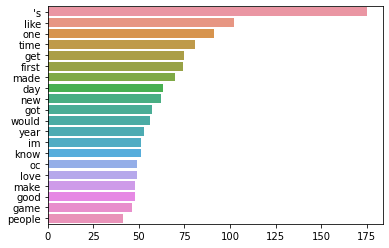

In [70]:
x, y= [], []
for i in range(20):
        x.append(total.index[i])
        y.append(total[i])
sns.barplot(x=y,y=x)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
corpus = posts['title'].tolist()

In [47]:
vectorizer = TfidfVectorizer()

In [48]:
X = vectorizer.fit_transform(corpus)

In [49]:
X

<3000x7014 sparse matrix of type '<class 'numpy.float64'>'
	with 24317 stored elements in Compressed Sparse Row format>

In [50]:
vectorizer.get_feature_names()

['00',
 '000',
 '049',
 '08',
 '0_o',
 '10',
 '100',
 '1000',
 '1000000',
 '100people',
 '100th',
 '101',
 '109',
 '11',
 '119',
 '11am',
 '12',
 '120',
 '125',
 '1280',
 '1280x1600',
 '13',
 '130',
 '1300',
 '1333244206748491776',
 '136',
 '13th',
 '14',
 '1400',
 '144',
 '1440x2560',
 '14s_data',
 '15',
 '150',
 '155',
 '1599x1006',
 '16',
 '160',
 '1600',
 '1610',
 '166',
 '169',
 '17',
 '1734',
 '18',
 '180',
 '1800s',
 '1859',
 '186cm',
 '1885x3044',
 '1888',
 '18m',
 '19',
 '1900s',
 '1906',
 '1909',
 '1911',
 '1912',
 '1928',
 '1940',
 '1944',
 '1946',
 '1948',
 '1950s',
 '1958',
 '195lbs',
 '1964',
 '1967',
 '1970',
 '1982',
 '1983',
 '1985',
 '1987',
 '1989',
 '1990',
 '1992',
 '1997',
 '1999',
 '1kg',
 '1st',
 '1war',
 '20',
 '200',
 '2000s',
 '2001',
 '2010',
 '201130',
 '2012',
 '2013',
 '2014',
 '2016',
 '2018',
 '2019',
 '2020',
 '2021',
 '206lbs',
 '20k',
 '20s',
 '20th',
 '21',
 '212',
 '2143x1435',
 '2160',
 '21m',
 '22',
 '220',
 '23',
 '2392',
 '24',
 '25',
 '250',
 

In [51]:
print(X)

  (0, 6427)	0.35051396023070275
  (0, 4483)	0.2955623230329045
  (0, 6645)	0.4409293913457913
  (0, 2072)	0.3923317000350596
  (0, 807)	0.3340641447519599
  (0, 1202)	0.419424570358669
  (0, 535)	0.3923317000350596
  (1, 5934)	0.293020193070539
  (1, 1107)	0.21865381548242155
  (1, 4378)	0.37885954181950815
  (1, 4301)	0.22660580700109187
  (1, 438)	0.15529377131901914
  (1, 813)	0.3650773114643066
  (1, 1489)	0.37885954181950815
  (1, 6)	0.30861048150008447
  (1, 2888)	0.2148625163849897
  (1, 6947)	0.3305519944043495
  (1, 6790)	0.22037524088810737
  (1, 4483)	0.26697674432282154
  (2, 6567)	0.3406424555150445
  (2, 2480)	0.20769037583853744
  (2, 3652)	0.5021716522754541
  (2, 5611)	0.47767994975131445
  (2, 2880)	0.29672582517032536
  (2, 4525)	0.4264997945888447
  :	:
  (2994, 4165)	0.4144406881959566
  (2994, 2480)	0.1487823945940295
  (2994, 438)	0.14026457228008626
  (2995, 2464)	0.4617247040979809
  (2995, 6335)	0.3677554423038242
  (2995, 4387)	0.302328173199494
  (2995, 6931